# COVID-19 analysis

## Data scraped from polovniautomobili.com

### Parameters:
 - Marka - Brand of the car
 - Model - Model of the car
 - Godiste - Year of production
 - Kilometraza - Mileage
 - Karoserija - Car type
 - Gorivo - Fuel type
 - Kubikaza - Engine volume
 - Snaga - Engine power (BHS)
 - Cena - Car price in euros
 - Godine - Year of getting the data
 



In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
data = pd.read_csv('kombinovani19-21.csv')

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26963 entries, 0 to 26962
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marka        26963 non-null  object 
 1   Model        26963 non-null  object 
 2   Godiste      26963 non-null  int64  
 3   Kilometraza  26963 non-null  int64  
 4   Karoserija   26963 non-null  object 
 5   Gorivo       26963 non-null  object 
 6   Kubikaza     26963 non-null  float64
 7   Snaga        26963 non-null  int64  
 8   Cena         26963 non-null  int64  
 9   Godina       26963 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


## Data preprocessing and cleaning


In [289]:
data['Karoserija'].unique()

array(['Limuzina', 'Hečbek', 'Kupe', 'Karavan', 'Kabriolet/Roadster',
       'Džip/SUV', 'Monovolumen (MiniVan)', 'Pickup', 'Limuzina ',
       'Kupe ', 'Hecbek ', 'Karavan ', 'Dzip/SUV ', 'Kabriolet/Roadster ',
       'Monovolumen (MiniVan) ', 'Pickup '], dtype=object)

Setting some categorical data from different datasets (2019, 2021) to identical labels. In this case setting type of a car to have the exact same types in two datasets.

In [290]:
data['Karoserija'] = data['Karoserija'].replace(['Hečbek', 'Džip/SUV'], ['Hecbek','Dzip/SUV'])

In [291]:
data['Karoserija'] = data['Karoserija'].apply(lambda x: x.replace(' ',''))

In [292]:
data['Karoserija'].unique()

array(['Limuzina', 'Hecbek', 'Kupe', 'Karavan', 'Kabriolet/Roadster',
       'Dzip/SUV', 'Monovolumen(MiniVan)', 'Pickup'], dtype=object)

In [293]:
data['Gorivo'] = data['Gorivo'].apply(lambda x: x.replace(' ',''))

In [294]:
data['Gorivo'].unique()

array(['Benzin', 'Dizel', 'Benzin+Gas(TNG)', 'Benzin+Metan(CNG)',
       'Hibridnipogon', 'MetanCNG'], dtype=object)

In [295]:
data[data['Godina']==2021]['Marka'].unique()

array(['Alfa Romeo', 'Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Hyundai',
       'Kia', 'Lancia', 'Mazda', 'Mercedes Benz', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Seat', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo', 'Škoda'], dtype=object)

In [296]:
data['Marka'] = data['Marka'].apply(lambda x: x.upper())

In [297]:
data.drop(data[data['Marka']=='ŠKODA'].index, inplace=True)

In [298]:
data[data['Godina']==2021]['Marka'].unique()

array(['ALFA ROMEO', 'AUDI', 'BMW', 'CITROEN', 'FIAT', 'FORD', 'HYUNDAI',
       'KIA', 'LANCIA', 'MAZDA', 'MERCEDES BENZ', 'NISSAN', 'OPEL',
       'PEUGEOT', 'RENAULT', 'SEAT', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN',
       'VOLVO'], dtype=object)

### Cleaning the outliers 

**Note**: All the mins and max were set by looking at corresponding graphs before dropping all the data.

In [299]:
data['Godina'] = data['Godina'].astype(str)

In [300]:
data.dtypes

Marka           object
Model           object
Godiste          int64
Kilometraza      int64
Karoserija      object
Gorivo          object
Kubikaza       float64
Snaga            int64
Cena             int64
Godina          object
dtype: object

#### Mileage

In [301]:
data.drop(data[data['Kilometraza']<20000].index, inplace=True)
data.drop(data[data['Kilometraza']>400000].index, inplace=True)

In [302]:
data['Kilometraza'].min()

20000

In [303]:
data['Kilometraza'].max()

400000

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Kilometraža (km)')

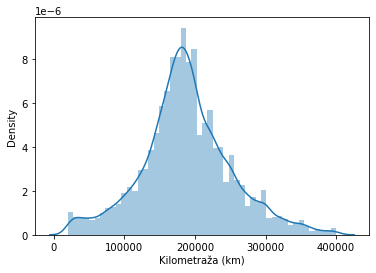

In [304]:
sns.distplot(data['Kilometraza'])
plt.xlabel('Kilometraža (km)')

#### Price

In [305]:
data.drop(data[data['Cena']<500].index, inplace=True)
data.drop(data[data['Cena']>30000].index, inplace=True)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cena (€)')

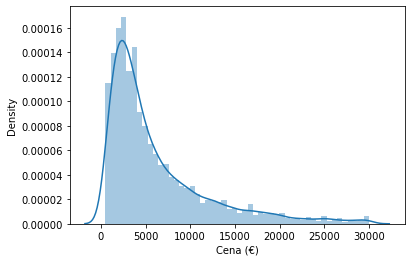

In [306]:
sns.distplot(data['Cena'])
plt.xlabel('Cena (€)')

#### Year of production

In [307]:
data.drop(data[data['Godiste']<1995].index, inplace=True)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Godište')

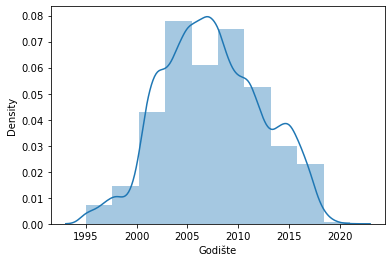

In [308]:
sns.distplot(data['Godiste'], bins=10)
plt.xlabel('Godište')

Text(0.5, 6.79999999999999, 'Snaga')

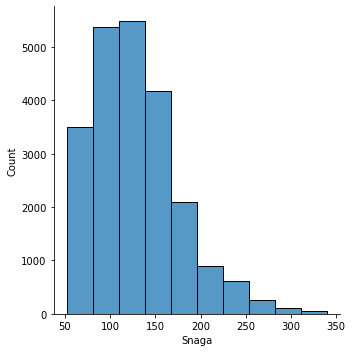

In [309]:
data.drop(data[(data['Snaga']>=350) | (data['Snaga']<=50)].index, inplace=True)
sns.displot(data['Snaga'], bins=10)
plt.xlabel('Snaga')

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Karoserija', ylabel='count'>

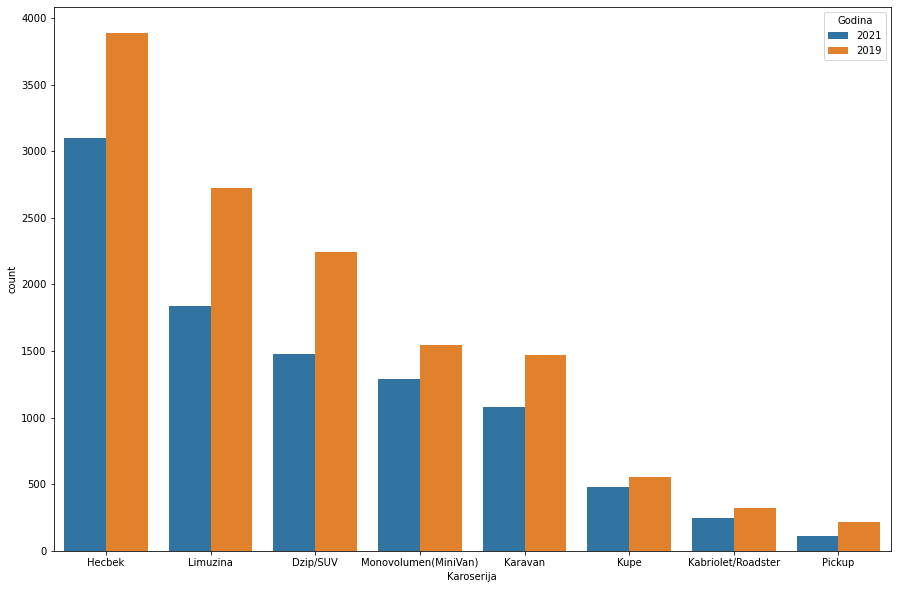

In [310]:
plt.figure(figsize=(15,10))
sns.countplot(data['Karoserija'], data=data,  order = data['Karoserija'].value_counts().index, hue='Godina')

Keeping only cars that exists in both datasets, that is deleting all the different models of cars in our dataset.

In [311]:
data['Model'] = data['Model'].apply(lambda x: x.upper())

In [312]:
new_cars = data[data['Godina']=='2021']['Model'].unique()
print(new_cars)

['145' '147' '156' '156 CROSSWAGON' '159' '166' 'BRERA' 'GIULIA'
 'GIULIETTA' 'GT' 'GTV' 'MITO' 'SPIDER' '90' 'A1' 'A2' 'A3' 'A4'
 'A4 ALLROAD' 'A5' 'A6' 'A6 ALLROAD' 'A7' 'A8' 'Q2' 'Q3' 'Q5' 'Q7' 'S1'
 'S3' 'S5' 'S6' 'SQ5' 'TT' '114' '116' '118' '120' '123' '125' '218' '220'
 '316' '318' '320' '323' '325' '328' '330' '335' 'COMPACT' '320 GT'
 '318 GT' '418' '420' '425' '428' '430' '435' '518' '520' '523' '525'
 '528' '530' '535' '535 GT' '530 GT' '520 GT' '630' '635' '640' '730'
 '740' 'M 135I' 'X5 M' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'Z4' 'Z3' 'BERLINGO'
 'C1' 'C2' 'C3' 'C3 AIRCROSS' 'C3 PICASSO' 'C3 PLURIEL' 'C4' 'C4 AIRCROSS'
 'C4 CACTUS' 'C4 GRAND PICASSO' 'C4 PICASSO' 'C5' 'C6' 'C8' 'DS3' 'DS4'
 'DS5' 'DS7' 'EVASION' 'JUMPY' 'NEMO' 'SAXO' 'XANTIA' 'XSARA'
 'XSARA PICASSO' 'ZX' '500' '500C' '500L' '500X' 'ALBEA' 'BARCHETTA'
 'BRAVA' 'BRAVO' 'COUPE' 'CROMA' 'DOBLO' 'EVO' 'FIORINO' 'FREEMONT'
 'GRANDE PUNTO' 'IDEA' 'LINEA' 'MAREA' 'MARENGO' 'MULTIPLA' 'PALIO'
 'PANDA' 'PUNTO' 'QUBO' 'SC

In [313]:
old_cars = data[data['Godina']=='2019']['Model'].unique()
print(old_cars)

['145' '146' '147' '155' '156' '156 CROSSWAGON' '159' '164' '166' 'BRERA'
 'GIULIA' 'GIULIETTA' 'GT' 'GTV' 'MITO' '100' 'A1' 'A2' 'A3' 'A4'
 'A4 ALLROAD' 'A5' 'A6' 'A6 ALLROAD' 'A7' 'A8' 'Q2' 'Q3' 'Q5' 'Q7' 'RS Q3'
 'S3' 'S4' 'S6' 'SQ5' 'TT' 'TTS' '114' '116' '118' '120' '123' '125' '135'
 'SERIJA 2' '218' '220' 'SERIJA 3' '316' '318' '320' '323' '325' '328'
 '330' '335' 'COMPACT' 'SERIJA 3 GT' '318 GT' '320 GT' 'SERIJA 4' '418'
 '420' '430' '435' 'SERIJA 5' '518' '520' '523' '525' '528' '530' '535'
 'SERIJA 5 GT' '520 GT' '530 GT' 'SERIJA 6' '630' '640' 'SERIJA 7' '730'
 '740' 'SERIJA X' 'X1' 'X3' 'X4' 'X5' 'X6' 'SERIJA Z' 'Z3' 'Z4' 'TENGO'
 'TIGGO' 'CAPTIVA' 'CRUZE' 'EPICA' 'EVANDA' 'KALOS' 'LACETTI' 'MALIBU'
 'MATIZ' 'NUBIRA' 'ORLANDO' 'SPARK' 'TACUMA' 'TRAX' '300C' 'GRAND VOYAGER'
 'NEON' 'PT CRUISER' 'SEBRING' 'STRATUS' 'VOYAGER' 'BERLINGO' 'C CROSSER'
 'C ELYSEE' 'C1' 'C2' 'C3' 'C3 PICASSO' 'C3 PLURIEL' 'C4' 'C4 AIRCROSS'
 'C4 CACTUS' 'C4 GRAND PICASSO' 'C4 PICASSO' 'C5' 'C6' 'C8

In [314]:
same_cars = set(new_cars) & set(old_cars)
print(len(same_cars))
print(list(same_cars))

425
['FIORINO', 'CORSA E', 'GIULIA', 'QASHQAI', 'A5', 'PROBE', 'C 240', '123', 'ASTRA G', 'ML 270', 'CROMA', 'ROCSTA', 'MODUS', '4007', 'MII', '114', 'FLUENCE', 'IGNIS', 'E 280', 'GLK 220', 'E 250', '640', 'ESPACE', 'A8', 'ASTRA J', 'ML 230', 'VERSO', 'CORSA D', 'GALLOPER', 'PICANTO', 'GRANDE PUNTO', 'JETTA', 'CEE`D SW', 'S80', 'CELICA', 'ML 300', 'Q3', 'ZX', 'POLO', 'H 1', 'DEDRA', 'YPSILON', 'TOUAREG', 'VEL SATIS', 'SJ SAMURAI', 'CADDY', 'AGILA', 'CLK 320', 'CLK 200', 'PASSAT B3', 'CORSA C', 'CLK 230', 'A 190', 'TWINGO', 'QASHQAI + 2', 'XC60', 'LANTRA', '3', '330', 'MARENGO', 'COMPACT', 'CLS 350', 'E 240', 'MURANO', 'R 350', 'MOKKA X', 'C6', '607', 'EXPRESS', 'IX35', 'CLA 220', 'RIO', 'AVENSIS', 'COUPE', '320 GT', '730', 'GTV', 'SCUDO', 'PALIO', '116', 'TOLEDO', 'BORA', 'C 230', 'BARCHETTA', 'E 270', 'E 320', 'SLK 230', 'SQ5', 'CLA 200', 'STREET KA', 'B 250', 'KOLEOS', 'COROLLA VERSO', 'MULTIPLA', 'S40', 'ALTEA XL', 'G 300', 'XC70', '106', 'PASSAT B8', '525', 'Z4', 'VENGA', 'LUPO', '

In [315]:
data.drop(data[data['Marka']=='LEXUS'].index,inplace=True)

In [316]:
data.drop(data[~data['Model'].isin(same_cars)].index, inplace=True)

In [317]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena,Godina
1,ALFA ROMEO,145,1996,188754,Hecbek,Benzin,2.5,250,1400,2021
2,ALFA ROMEO,147,2007,196000,Hecbek,Dizel,1.9,120,2499,2021
3,ALFA ROMEO,147,2004,151000,Hecbek,Dizel,1.9,116,1990,2021
4,ALFA ROMEO,147,2008,176000,Hecbek,Benzin+Gas(TNG),1.6,105,2690,2021
5,ALFA ROMEO,147,2002,160000,Hecbek,Dizel,1.9,116,1899,2021
...,...,...,...,...,...,...,...,...,...,...
26958,VOLVO,XC90,2012,236000,Dzip/SUV,Dizel,2.5,185,18500,2019
26959,VOLVO,XC90,2005,299000,Dzip/SUV,Dizel,2.5,197,6999,2019
26960,VOLVO,XC90,2003,250000,Dzip/SUV,Dizel,2.5,192,4950,2019
26961,VOLVO,XC90,2006,280283,Dzip/SUV,Dizel,2.5,185,7000,2019


Deleting cars that are produced in the same year or one year prior to the source year of getting the data.
 - For 2019 cars that would be 2019 and 2018.
 - For 2021 cars that would be 2021 and 2020.

In [318]:
data.drop(data[(data['Godina']=='2019') & (data['Godiste']==2019)].index, inplace=True)
data.drop(data[(data['Godina']=='2021') & (data['Godiste']==2021)].index, inplace=True)
data.drop(data[(data['Godina']=='2019') & (data['Godiste']==2018)].index, inplace=True)
data.drop(data[(data['Godina']=='2021') & (data['Godiste']==2020)].index, inplace=True)


In [319]:
data['Godina'].value_counts()

2019    9888
2021    9401
Name: Godina, dtype: int64

In [320]:
data['Karoserija'].value_counts()

Hecbek                  6121
Limuzina                3796
Dzip/SUV                2853
Monovolumen(MiniVan)    2604
Karavan                 2283
Kupe                     879
Kabriolet/Roadster       467
Pickup                   286
Name: Karoserija, dtype: int64

In [321]:
data.drop(data[(data['Karoserija']=='Kupe') | (data['Karoserija']=='Kabriolet/Roadster') | (data['Karoserija']=='Pickup')].index, inplace=True)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Hecbek'),
  Text(1, 0, 'Limuzina'),
  Text(2, 0, 'Dzip/SUV'),
  Text(3, 0, 'Monovolumen(MiniVan)'),
  Text(4, 0, 'Karavan')])

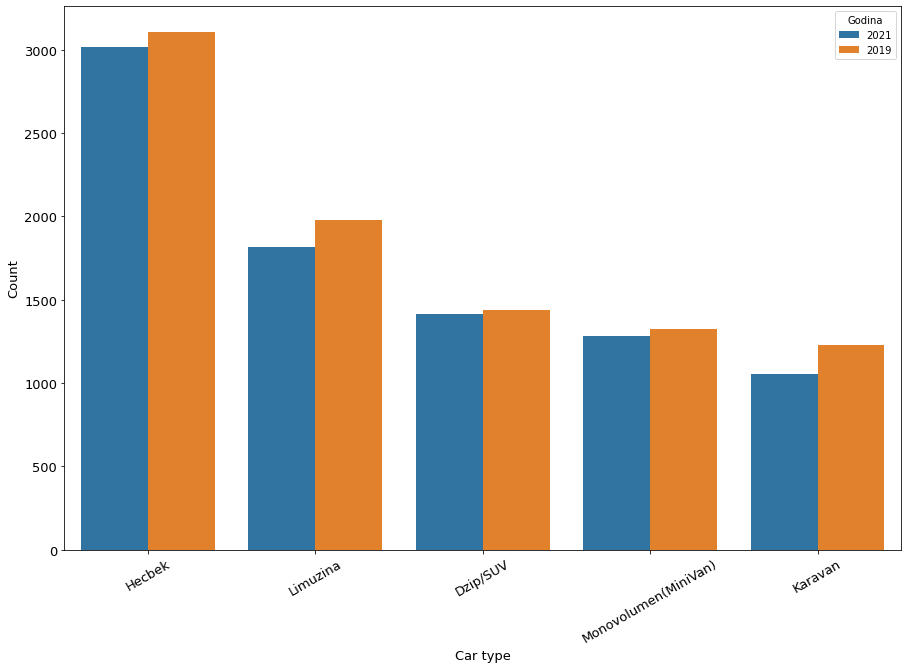

In [322]:
plt.figure(figsize=(15,10))
sns.countplot(data['Karoserija'], data=data,  order = data['Karoserija'].value_counts().index, hue='Godina')
plt.xlabel('Car type', fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=30)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

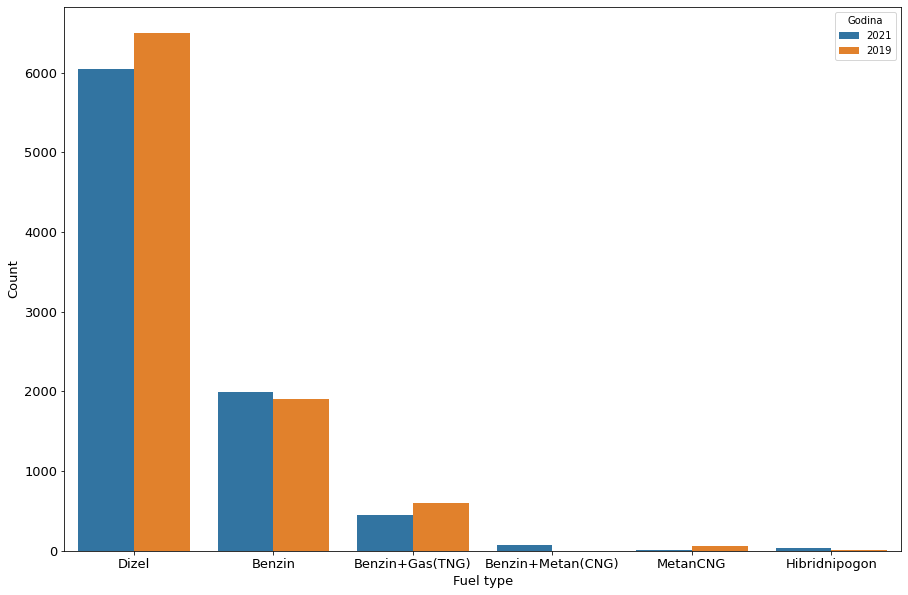

In [323]:
plt.figure(figsize=(15,10))
sns.countplot(data['Gorivo'], data=data,  order = data['Gorivo'].value_counts().index, hue='Godina')
plt.xlabel('Fuel type', fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [324]:
data.drop(data[(data['Gorivo']=='Benzin+Metan(CNG)') | (data['Gorivo']=='Hibridnipogon') | (data['Gorivo']=='MetanCNG')].index, inplace=True)

In [325]:
data['Gorivo'].value_counts()

Dizel              12542
Benzin              3894
Benzin+Gas(TNG)     1049
Name: Gorivo, dtype: int64

In [326]:
data['Karoserija'].value_counts()

Hecbek                  6064
Limuzina                3773
Dzip/SUV                2852
Monovolumen(MiniVan)    2529
Karavan                 2267
Name: Karoserija, dtype: int64

In [327]:
value_counts19 = data[data['Godina']=='2019']['Model'].value_counts()
value_counts21 = data[data['Godina']=='2021']['Model'].value_counts()
to_remove19 = value_counts[value_counts < 25].index
to_remove21 = value_counts[value_counts < 25].index
data['Model'].replace(to_remove19, np.nan, inplace=True)
data['Model'].replace(to_remove21, np.nan, inplace=True)

In [328]:
data.dropna()

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena,Godina
1,ALFA ROMEO,145,1996,188754,Hecbek,Benzin,2.5,250,1400,2021
2,ALFA ROMEO,147,2007,196000,Hecbek,Dizel,1.9,120,2499,2021
3,ALFA ROMEO,147,2004,151000,Hecbek,Dizel,1.9,116,1990,2021
4,ALFA ROMEO,147,2008,176000,Hecbek,Benzin+Gas(TNG),1.6,105,2690,2021
5,ALFA ROMEO,147,2002,160000,Hecbek,Dizel,1.9,116,1899,2021
...,...,...,...,...,...,...,...,...,...,...
26923,VOLVO,XC70,2004,271401,Karavan,Dizel,2.5,163,4950,2019
26924,VOLVO,XC70,2003,291000,Dzip/SUV,Dizel,2.5,163,5000,2019
26925,VOLVO,XC70,2001,257000,Karavan,Benzin,2.5,200,3500,2019
26926,VOLVO,XC70,2003,260000,Karavan,Dizel,2.5,163,4000,2019


In [329]:
data[data['Godina']=='2021']['Model'].value_counts()

B 200       56
ASTRA J     55
CORSA D     54
E 220       53
C 180       52
            ..
C 240        1
KAPPA        1
335          1
626          1
VECTRA A     1
Name: Model, Length: 314, dtype: int64

In [330]:
data[data['Godina']=='2019']['Model'].value_counts()

159              48
XSARA PICASSO    48
AGILA            48
ASTRA J          47
C4               47
                 ..
TT                1
COUPE             1
GT                1
SHUMA             1
FESTIVA           1
Name: Model, Length: 325, dtype: int64

In [331]:
data['Model'].value_counts()

ASTRA J         102
CORSA D         101
B 200            98
GRAND VITARA     96
ML 270           96
               ... 
PUMA              1
CUBE              1
TT                1
C 300             1
GT                1
Name: Model, Length: 325, dtype: int64

In [332]:
data = data.groupby('Model').filter(lambda x: len(x)>50)

In [333]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena,Godina
2,ALFA ROMEO,147,2007,196000,Hecbek,Dizel,1.9,120,2499,2021
3,ALFA ROMEO,147,2004,151000,Hecbek,Dizel,1.9,116,1990,2021
4,ALFA ROMEO,147,2008,176000,Hecbek,Benzin+Gas(TNG),1.6,105,2690,2021
5,ALFA ROMEO,147,2002,160000,Hecbek,Dizel,1.9,116,1899,2021
6,ALFA ROMEO,147,2008,186240,Hecbek,Dizel,1.9,120,2750,2021
...,...,...,...,...,...,...,...,...,...,...
26833,VOLVO,V50,2007,177000,Karavan,Dizel,2.0,136,2799,2019
26834,VOLVO,V50,2007,220152,Karavan,Dizel,2.0,150,2100,2019
26835,VOLVO,V50,2004,205536,Karavan,Dizel,2.0,136,3790,2019
26836,VOLVO,V50,2010,173414,Karavan,Dizel,1.6,109,6300,2019


In [334]:
data['Model'].value_counts()

ASTRA J         102
CORSA D         101
B 200            98
ML 270           96
GRAND VITARA     96
               ... 
CADDY            54
5                53
PARTNER          52
1007             52
PICANTO          52
Name: Model, Length: 159, dtype: int64

Introducing new variable called Starost as in **age** of the car (year of getting the data - year of production)

In [335]:
data['Starost'] = data['Godina'].astype(int) -data['Godiste']

In [336]:
data['Starost']

2        14
3        17
4        13
5        19
6        13
         ..
26833    12
26834    12
26835    15
26836     9
26837    14
Name: Starost, Length: 12355, dtype: int64

# Exploratory data analysis


In [337]:
data.dropna(inplace=True)

<Figure size 1080x1080 with 0 Axes>

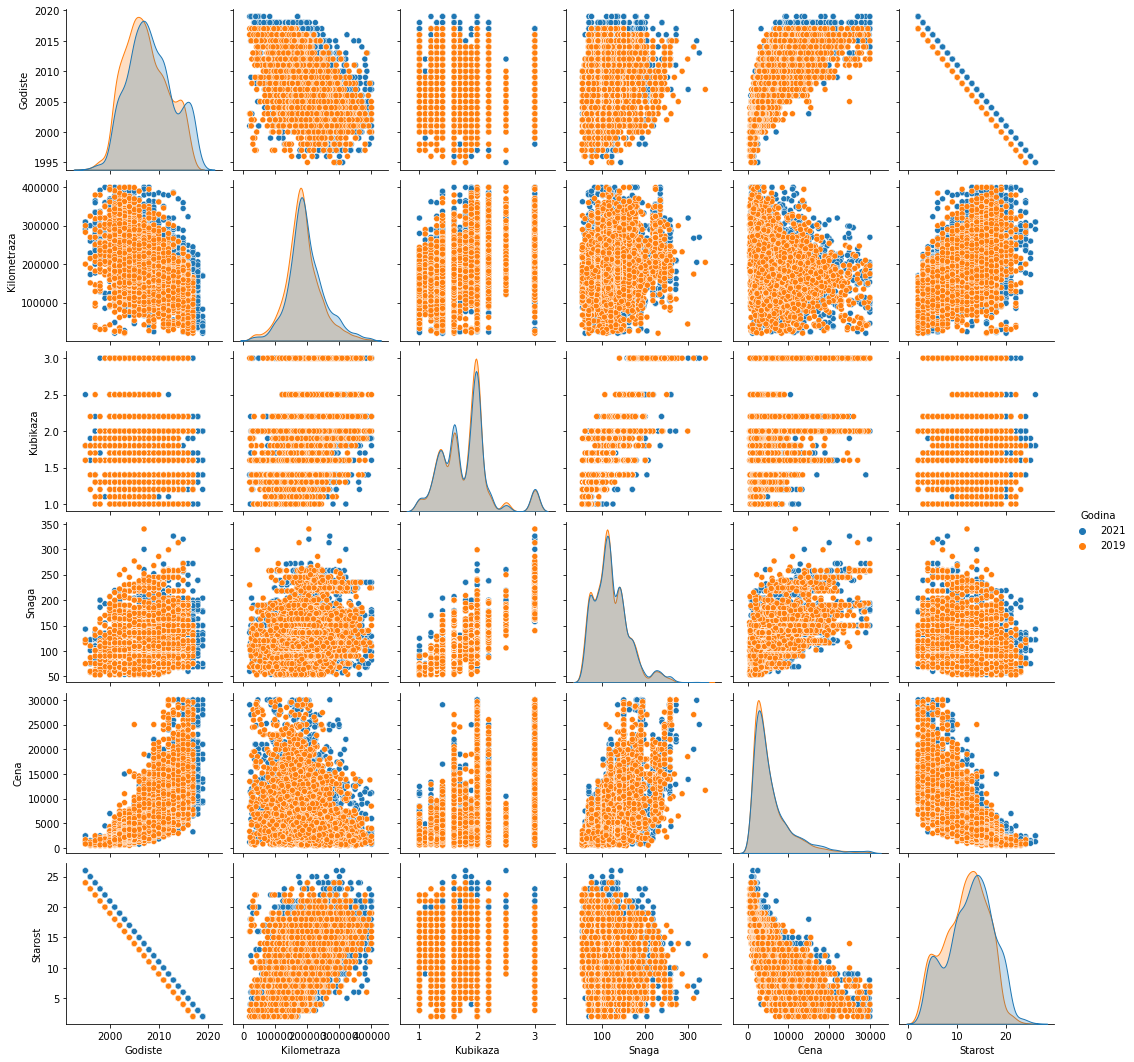

In [338]:
plt.figure(figsize=(15,15))
sns.pairplot(data, hue='Godina')

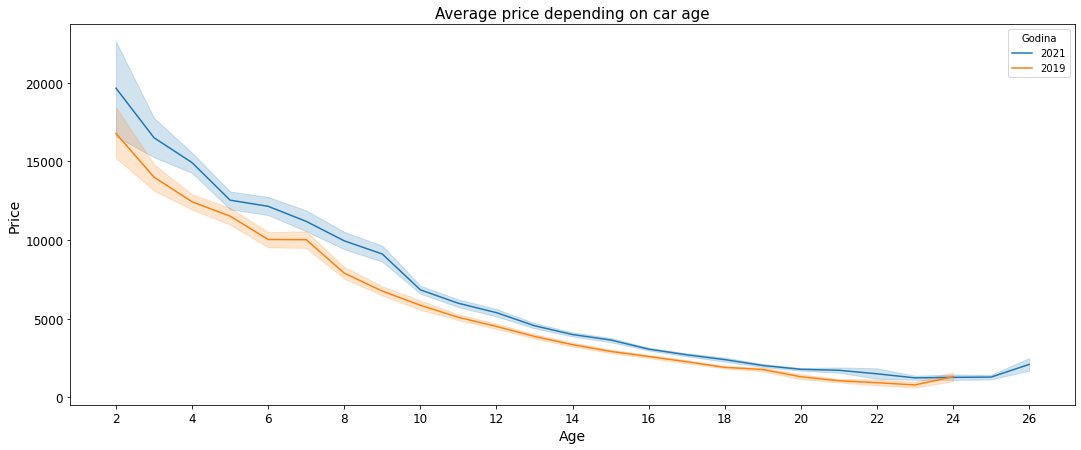

In [339]:
plt.figure(figsize=(18,7))
sns.lineplot(x = data['Starost'], y = data['Cena'], data=data, ci = 90, hue='Godina')
plt.title('Average price depending on car age',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(np.arange(2,27, 2),fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


#### Here we can see the difference between year of collecting data in order by age of a car. There is a general average price increase in data from 2021.

<AxesSubplot:xlabel='Godina', ylabel='Cena'>

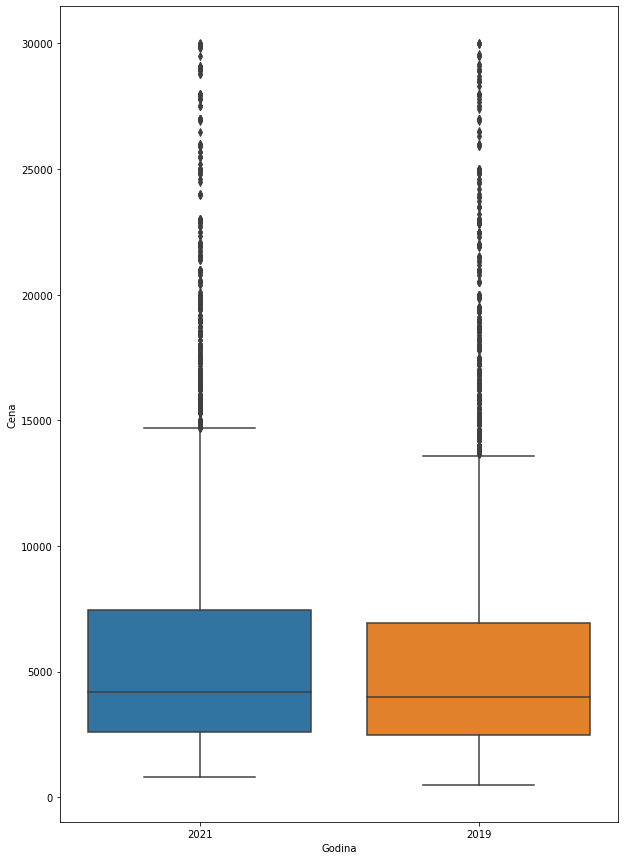

In [340]:
plt.figure(figsize=(10,15))
sns.boxplot(x=data['Godina'], y=data['Cena'], data=data)

In [363]:
price_old = data[(data['Godina']=='2019') & (data['Starost']<=10)]['Cena'].mean()
price_new = data[(data['Godina']=='2021') & (data['Starost']<=10)]['Cena'].mean()
print(price_old, price_new)
pct = (price_new/price_old)*100-100
print(pct)

9375.677914110429 10856.832301341588
15.797837775570514


### In general, there is a price difference of 6.85% between two datasets. Average price from 2019. is 5571e and average price from 2021. is 5952. From this we cannot conclude too much but we can agree, based on these first graphs that there is a general increase in price compared to the period before the Covid-19 pandemic.


## Expanding the search

I'm going to expand the search area by calculating average price depending on different categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

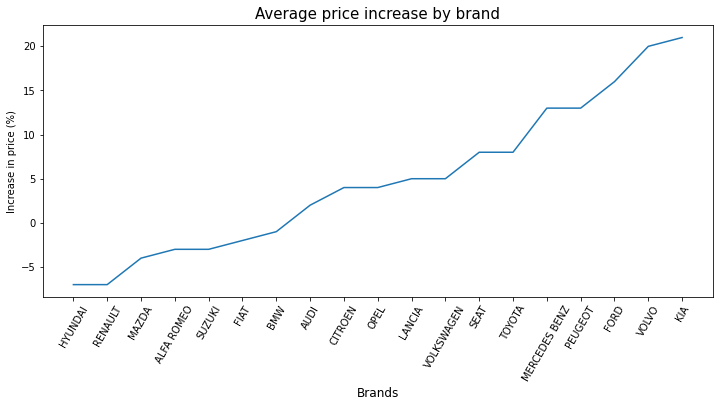

In [342]:
dict_marke = {}
for marka in data['Marka'].unique():
    stari = data[(data['Godina']=='2019') & (data['Marka']==marka)]['Cena'].mean()
    novi = data[(data['Godina']=='2021') & (data['Marka']==marka)]['Cena'].mean()
    dict_marke[marka] = round((novi/stari)*100-100) 

dict_marke={k: v for k, v in sorted(dict_marke.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,5))
sns.lineplot(x = dict_marke.keys(), y = dict_marke.values())
plt.title('Average price increase by brand', fontsize=15)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Increase in price (%)')
plt.xticks(rotation=60)

##### Note that for some brands there is negative increase in price, or in other words for some car brands (Suzuki, Alfa Romeo and Fiat) there seems to be a decrease in average price.

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

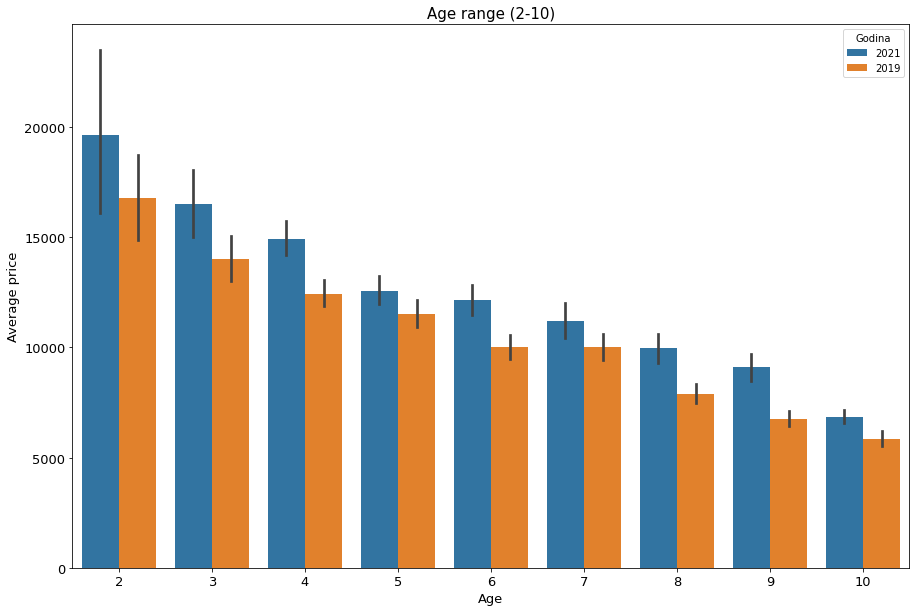

In [343]:
plt.figure(figsize=(15,10))
sns.barplot(x = data[data['Starost']<=10]['Starost'], y = data[data['Starost']<=10]['Cena'], data=data, hue='Godina')
plt.title('Age range (2-10)',fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

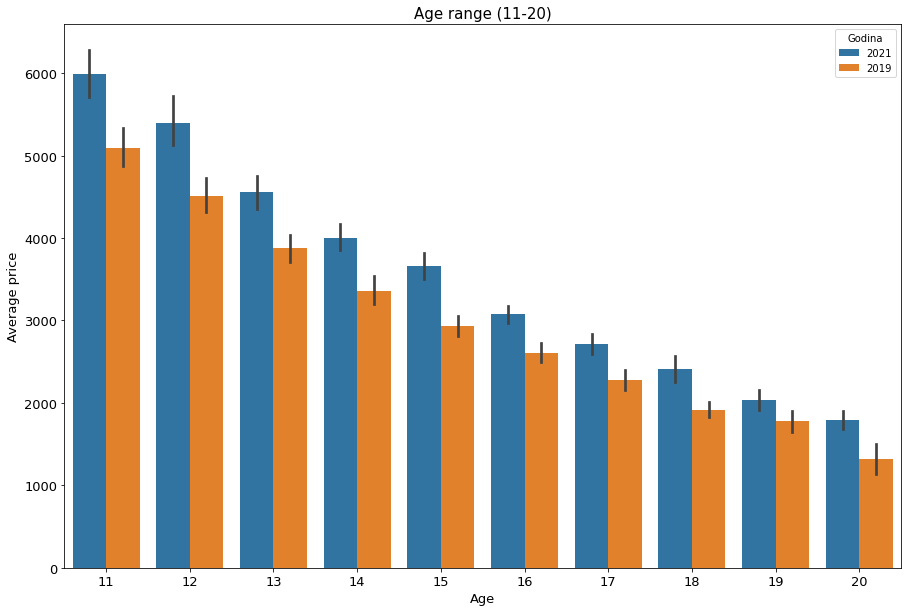

In [344]:
plt.figure(figsize=(15,10))
sns.barplot(x = data[(data['Starost']>10) & (data['Starost']<=20)]['Starost'], y = data[(data['Starost']>10) & (data['Starost']<=20)]['Cena'], data=data, hue='Godina')
plt.title('Age range (11-20)',fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#### Again, here is a general increase in average price depending on year of geting the data in order of car age. 

([<matplotlib.axis.XTick at 0x1b8c3b239d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

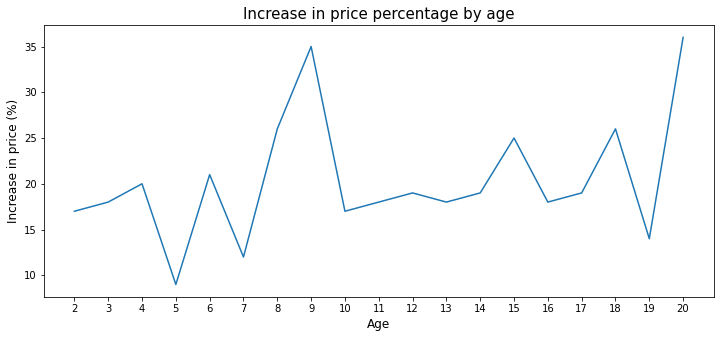

In [345]:
dict_starost = {}
for starost in np.arange(2,21):
    stari = data[(data['Godina']=='2019') & (data['Starost']==starost)]['Cena'].mean()
    novi = data[(data['Godina']=='2021') & (data['Starost']==starost)]['Cena'].mean()
    dict_starost[starost] = round((novi/stari)*100-100) 

dict_starost={k: v for k, v in sorted(dict_starost.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,5))
sns.lineplot(x = dict_starost.keys(), y = dict_starost.values())
plt.title('Increase in price percentage by age',fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Increase in price (%)', fontsize=12)
plt.xticks(np.arange(2,21))


#### Here is the exact percentage price increase plot depending on car age 




### Including one more category 'Drzava' (Country of origin)  where we can focus on another data parameter.

In [346]:
def convert_country(row):
    nemci = ['AUDI', 'BMW', 'MERCEDES BENZ', 'OPEL','VOLKSWAGEN']
    japanci = ['MAZDA','NISSAN', 'SUZUKI', 'TOYOTA']
    koreanci = ['HYUNDAI','KIA']
    italijani = ['ALFA ROMEO','FIAT', 'LANCIA']
    francuzi = ['PEUGEOT', 'RENAULT','CITROEN']
    if str(row) in nemci:
        return 'Germany'
    elif str(row) in japanci:
        return 'Japan'
    elif str(row) in koreanci:
        return 'South Korea'
    elif str(row) in italijani:
        return 'Italy'
    elif str(row) in francuzi:
        return 'France'
    else: return 'Other'

In [347]:
data['Drzava'] = data['Marka'].apply(lambda row: convert_country(row))

In [348]:
dict_drzave = {}
for drzava in data['Drzava'].unique():
    stari = data[(data['Godina']=='2019') & (data['Drzava']==drzava)]['Cena'].mean()
    novi = data[(data['Godina']=='2021') & (data['Drzava']==drzava)]['Cena'].mean()
    dict_drzave[drzava] = round((novi/stari)*100-100) 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

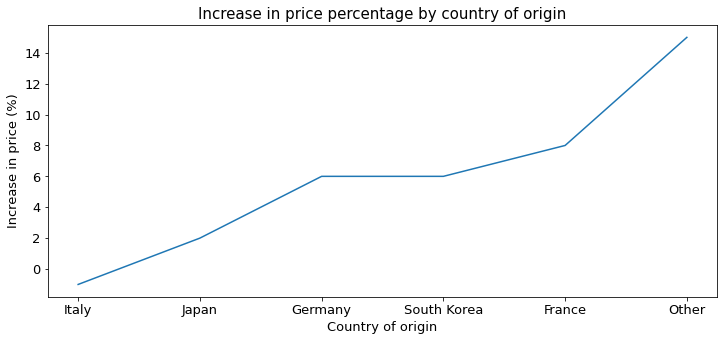

In [349]:
dict_drzave={k: v for k, v in sorted(dict_drzave.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,5))
sns.lineplot(x = dict_drzave.keys(), y = dict_drzave.values())
plt.title('Increase in price percentage by country of origin',fontsize=15)
plt.xlabel('Country of origin', fontsize=13)
plt.ylabel('Increase in price (%)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [370]:
data[data['Drzava']=='Other']['Marka'].value_counts()

FORD     518
VOLVO    310
SEAT     308
Name: Marka, dtype: int64

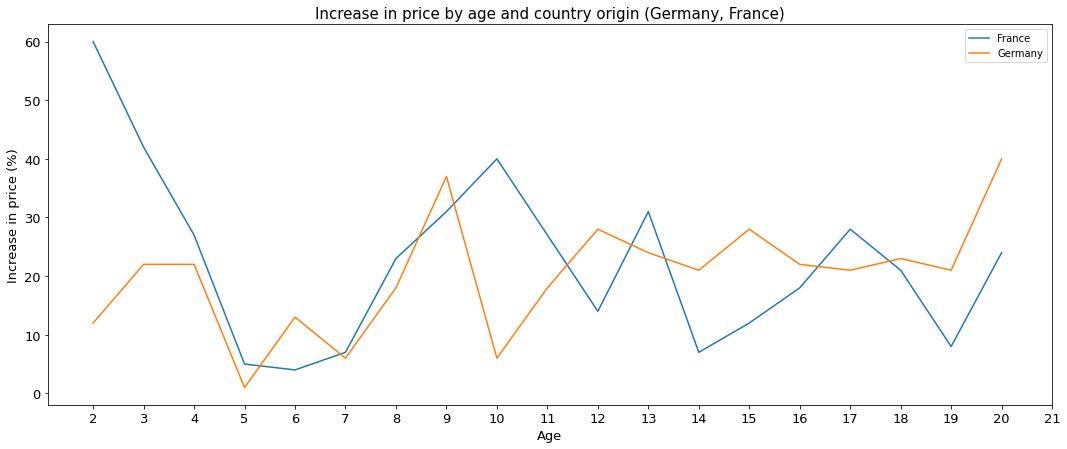

In [350]:
import math
dict_drst={}
plt.figure(figsize=(18,7))
for drzava in ['France', 'Germany']:
    for old in range(2, 21):
        stari = data[(data['Godina']=='2019') & (data['Drzava']==drzava)& (data['Starost']==old)]['Cena'].mean()
        novi = data[(data['Godina']=='2021') & (data['Drzava']==drzava)& (data['Starost']==old)]['Cena'].mean()
        if ~np.isnan(stari) and ~np.isnan(novi):
            dict_drst[old] = round((novi/stari)*100-100)
    plt.plot(dict_drst.keys(), dict_drst.values(), label=drzava)
   
    dict_drst={}
plt.xticks(list(np.arange(2,22)))
plt.title('Increase in price by age and country origin (Germany, France)',fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Increase in price (%)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()
    


In [351]:
data['Karoserija'].value_counts()

Hecbek                  4880
Limuzina                2485
Karavan                 1747
Dzip/SUV                1634
Monovolumen(MiniVan)    1609
Name: Karoserija, dtype: int64

In [352]:
karoserija = ['Hecbek', 'Limuzina',  'Karavan', 'Dzip/SUV', 'Pickup', 'Monovolumen(MiniVan)']

In [374]:
dict_tip = {}
for tip in data['Karoserija'].unique():
    stari = data[(data['Godina']=='2019') & (data['Karoserija']==tip)]['Cena'].mean()
    novi = data[(data['Godina']=='2021') & (data['Karoserija']==tip)]['Cena'].mean()
    dict_tip[tip] = round((novi/stari)*100-100)  

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

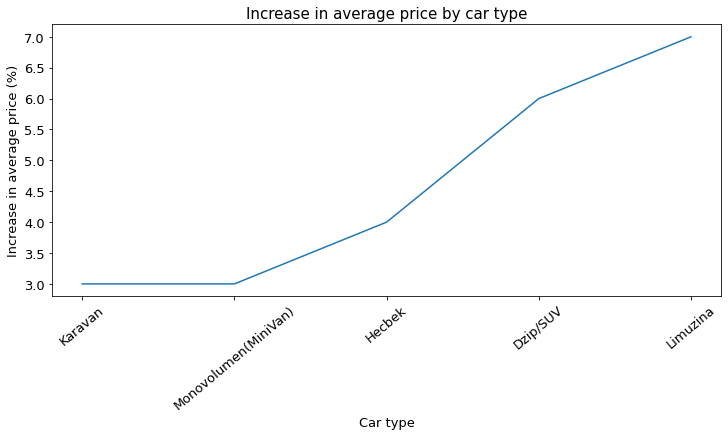

In [375]:
dict_tip={k: v for k, v in sorted(dict_tip.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,5))
sns.lineplot(x = dict_tip.keys(), y = dict_tip.values())
plt.title('Increase in average price by car type',fontsize=15)
plt.xlabel('Car type', fontsize=13)
plt.ylabel('Increase in average price (%)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=40)

In [355]:
data['Gorivo'].value_counts()

Dizel              9170
Benzin             2658
Benzin+Gas(TNG)     527
Name: Gorivo, dtype: int64

In [356]:
dict_tip = {}
#gorivo = ['Dizel', 'Benzin+Gas(TNG)', 'Benzin']
for tip in data['Gorivo'].unique():
    stari = data[(data['Godina']=='2019') & (data['Gorivo']==tip)]['Cena'].mean()
    novi = data[(data['Godina']=='2021') & (data['Gorivo']==tip)]['Cena'].mean()
    dict_tip[tip] = round((novi/stari)*100-100)  

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

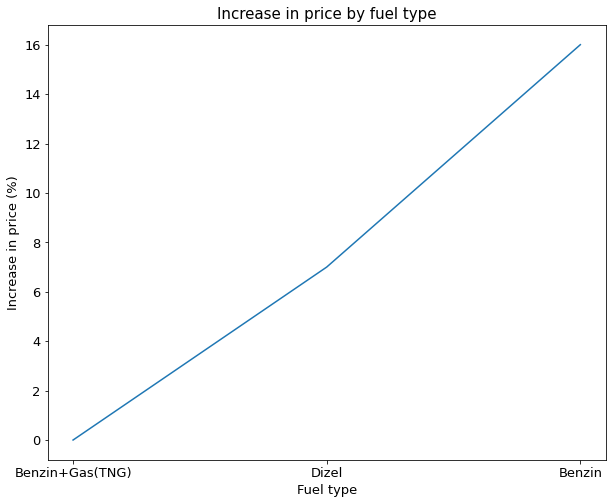

In [357]:
dict_tip={k: v for k, v in sorted(dict_tip.items(), key=lambda item: item[1])}
plt.figure(figsize=(10,8))
sns.lineplot(x = dict_tip.keys(), y = dict_tip.values())
plt.title('Increase in price by fuel type',fontsize=15)
plt.xlabel('Fuel type', fontsize=13)
plt.ylabel('Increase in price (%)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


### Although the majority of used cars in Serbia use diesel as fuel type , the most significant increase in average price of used car is with petrol engine cars (16%). 

## Checking the average price for some of the most popular car brands in Serbia

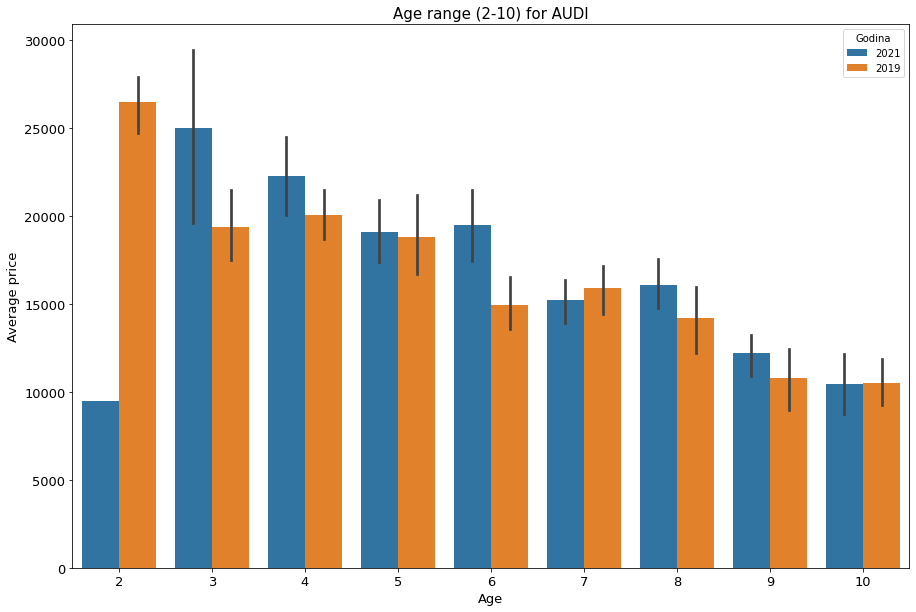

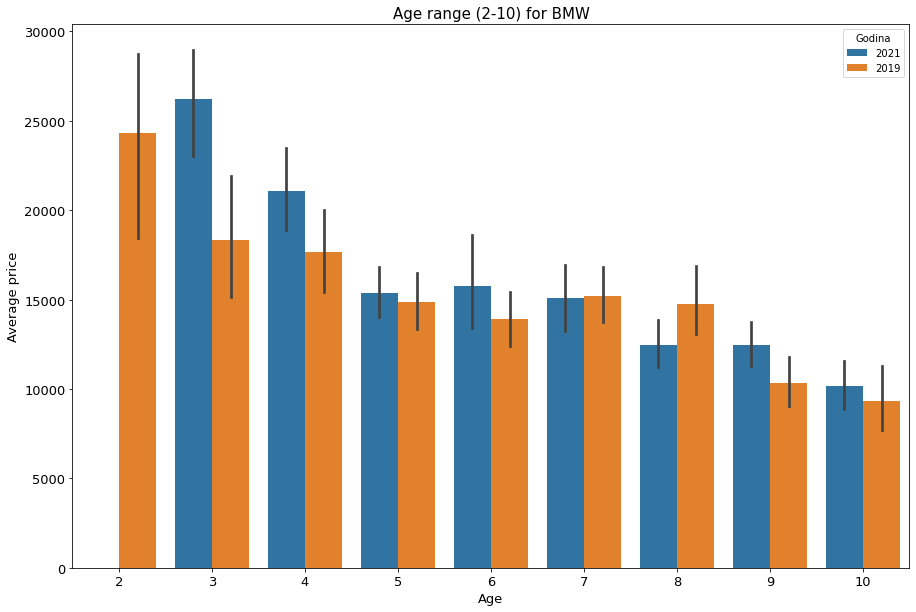

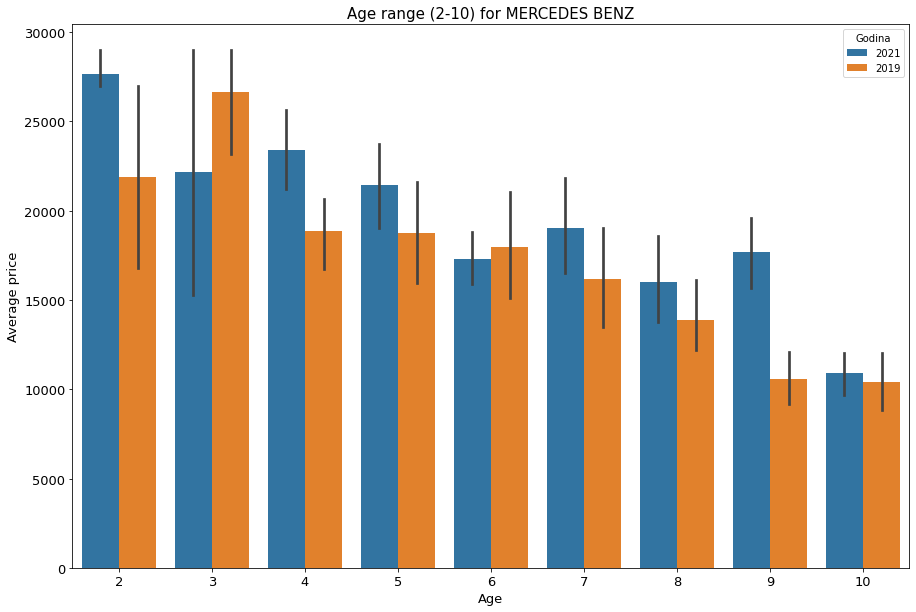

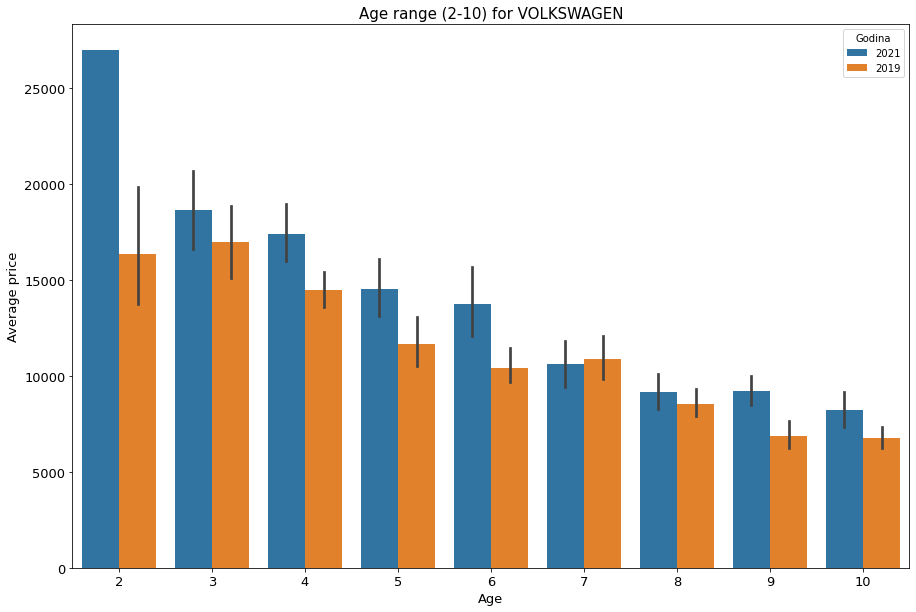

In [358]:

for brand in ['AUDI','BMW','MERCEDES BENZ', 'VOLKSWAGEN']:
    plt.figure(figsize=(15,10))
    sns.barplot(x = data[(data['Starost']<=10) & (data['Marka']==brand)]['Starost'], y = data[(data['Starost']<=10)& (data['Marka']==brand)]['Cena'], data=data, hue='Godina')
    plt.title('Age range (2-10) for {}'.format(brand),fontsize=15)
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Average price',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

### There is some disbalance in data for some brands in car age due to the method that data was collected, but overall there is a positive trend in price increase.

In [364]:
data['Marka'].value_counts().nlargest(5)

VOLKSWAGEN       1510
MERCEDES BENZ    1388
CITROEN          1165
OPEL             1162
PEUGEOT          1134
Name: Marka, dtype: int64

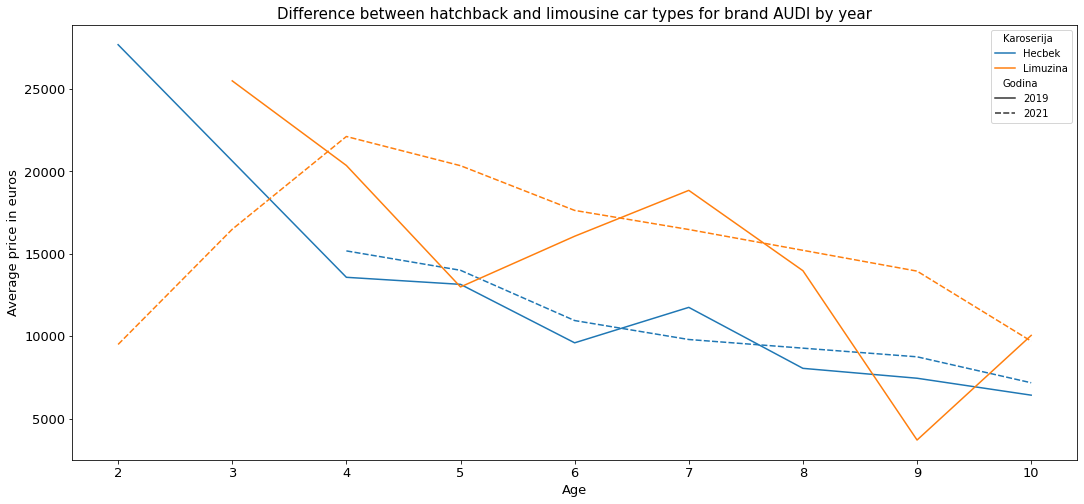

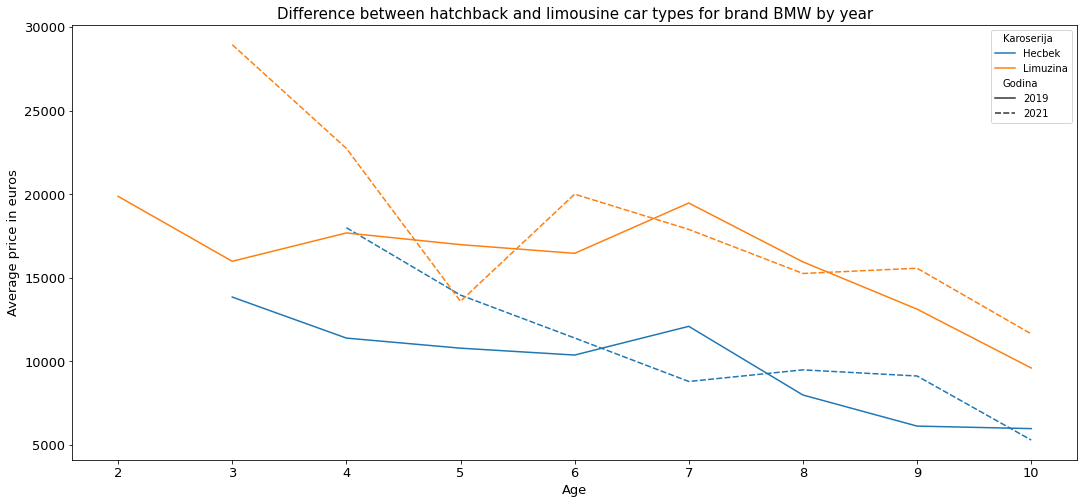

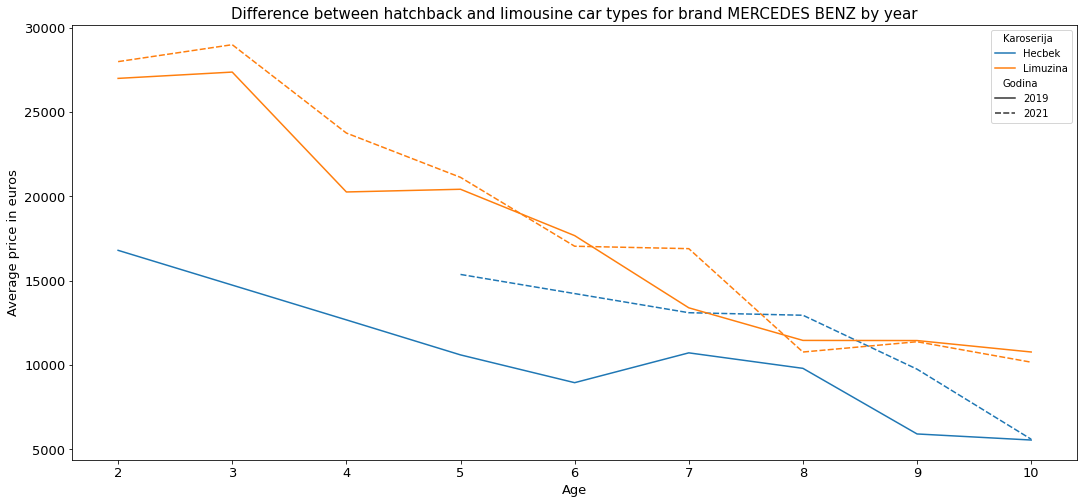

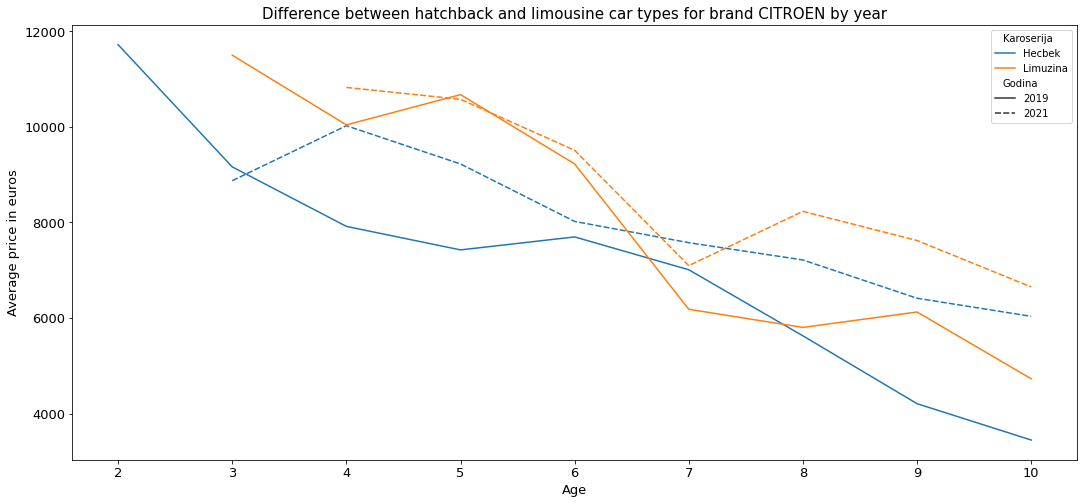

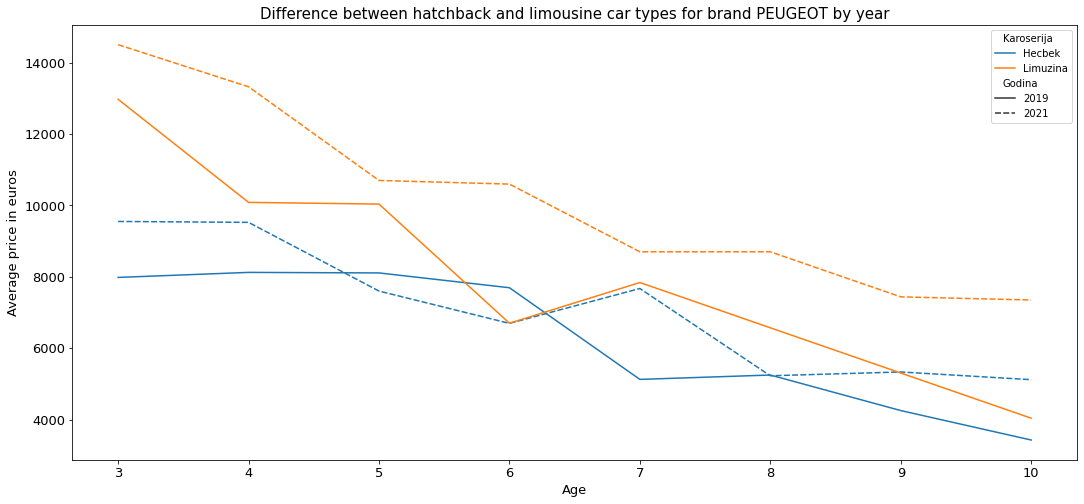

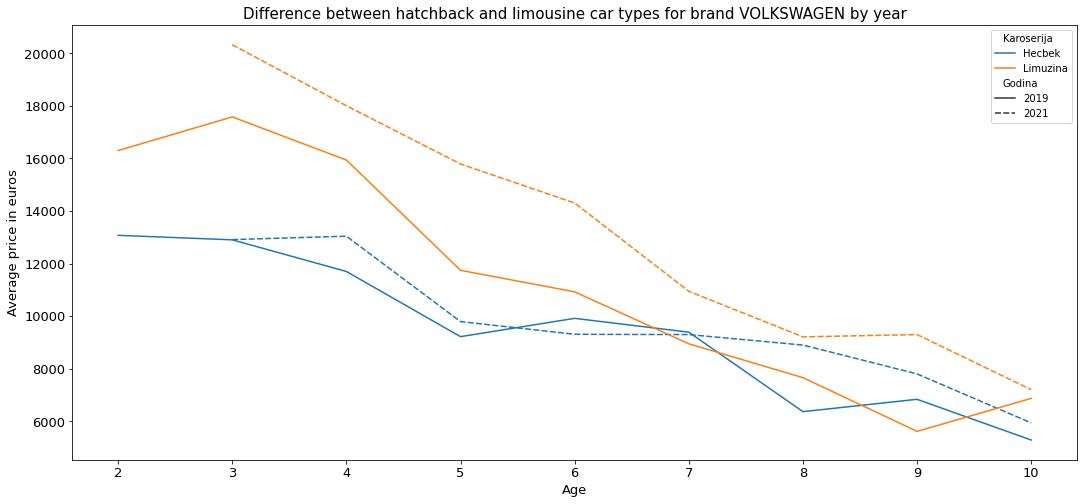

In [365]:
gb = data.groupby(['Godina','Marka','Model','Starost','Karoserija', 'Gorivo']).agg({'Cena':'mean'})
gb.reset_index(inplace=True)

for brand in ['AUDI','BMW','MERCEDES BENZ', 'CITROEN', 'PEUGEOT', 'VOLKSWAGEN']:
    
    plt.figure(figsize=(18,8))
    sns.lineplot(x=gb[(gb['Starost']<=10) & (gb['Marka']==brand) & (gb['Karoserija'].isin(['Hecbek','Limuzina']))]['Starost'], y=gb[(gb['Starost']<=10)& (gb['Marka']==brand) & (gb['Karoserija'].isin(['Hecbek','Limuzina']))]['Cena'], data=gb[(gb['Karoserija'].isin(['Hecbek','Limuzina']))], hue='Karoserija', style='Godina', ci=None)
    plt.title('Difference between hatchback and limousine car types for brand {} by year'.format(brand),fontsize=15)
    plt.xlabel('Age', fontsize=13)
    plt.ylabel('Average price in euros',fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()



##### Note the difference between dashed lines and full lines. Almost in every relevant chart (the one that has the same amount of data for each age and car type) the dashed line (cars from 2021) is above full line, indicating increase in price.

###### We can do this for different combinations of car types but we have to be carefull when selecting the number of car types because of the readibility of a graph, if it has too much car types, i.e. categories, it would't be easily read.

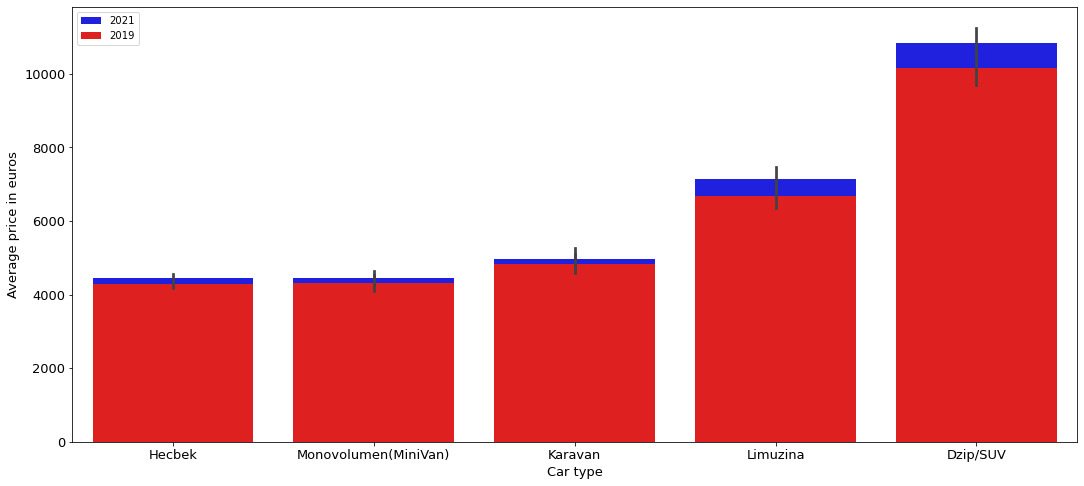

In [366]:
order = data.groupby(["Karoserija"])["Cena"].mean().sort_values().index
plt.figure(figsize=(18,8))
plot1 = sns.barplot(x = data['Karoserija'], y = data[data['Godina']=='2021']['Cena'], data=data, order= order, label='2021', color='blue')
plot2 = sns.barplot(x = data['Karoserija'], y = data[data['Godina']=='2019']['Cena'], data=data, order= order, label='2019', color='red')
plt.xlabel('Car type', fontsize=13)
plt.ylabel('Average price in euros',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()
    

#### The least average price difference is in MiniVan used cars, they also have the smallest average price over all other car types. The biggest average price difference is in SUV car type, which is expected due to highest average price.

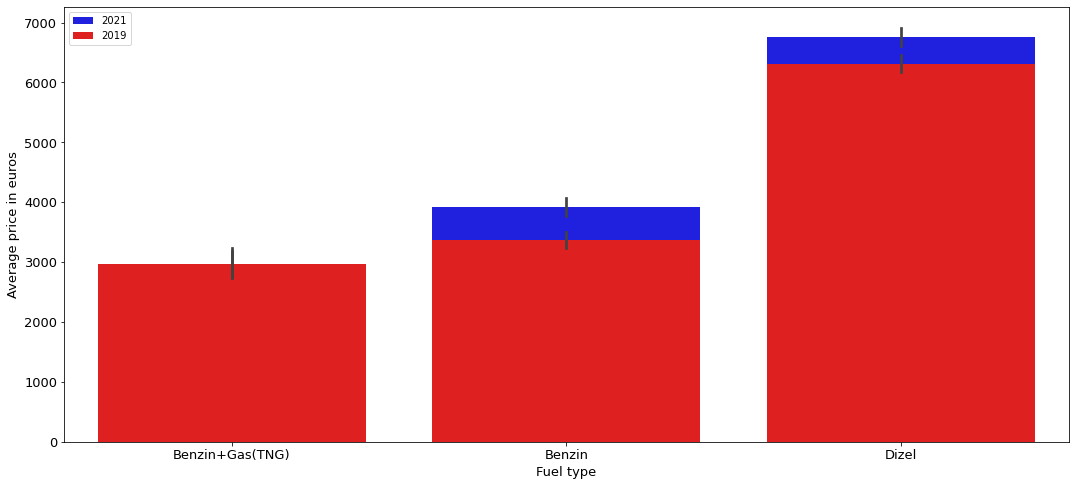

In [367]:
order = data.groupby(["Gorivo"])["Cena"].mean().sort_values().index
plt.figure(figsize=(18,8))
plot1 = sns.barplot(x = data['Gorivo'], y = data[data['Godina']=='2021']['Cena'], data=data, order= order, label='2021', color='blue')
plot2 = sns.barplot(x = data['Gorivo'], y = data[data['Godina']=='2019']['Cena'], data=data, order= order, label='2019', color='red')
plt.xlabel('Fuel type', fontsize=13)
plt.ylabel('Average price in euros',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

#### From the previous chart with fuel type we concluded that the biggest difference in average price increase was with petrol fuel type (Benzin), here we can confirm it with another graph and also see the average price difference between three fuel types.

In [376]:
data.to_csv('auto19-20-cleaned.csv', index=False)